In [30]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [31]:
from matplotlib import pyplot as plt
% matplotlib inline

In [32]:
data_mean = 3.
data_stddev = 0.5

In [44]:
g_input_size = 1
g_hidden_size = 75
g_output_size = 1
d_input_size = 1000
d_hidden_size = 50
d_output_size = 1
minibatch_size = d_input_size

In [45]:
d_learning_rate = 2e-4
g_learning_rate = 2e-4
optim_betas = (0.9, 0.999)
num_epochs = 30000
print_interval = 1000
d_steps = 1
g_steps = 1

In [46]:
def get_distribution_sampler(mu, sigma):
    return lambda n: torch.Tensor(np.random.normal(mu, sigma, (1,n)))

In [47]:
def get_generator_input_sampler():
    return lambda m, n: torch.rand(m, n)

In [48]:
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.map1 = nn.Linear(input_size, hidden_size)
        self.map2 = nn.Linear(hidden_size, hidden_size)
        self.map3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = F.elu(self.map1(x))
        x = F.sigmoid(self.map2(x))
        return self.map3(x)

class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Discriminator, self).__init__()
        self.map1 = nn.Linear(input_size, hidden_size)
        self.map2 = nn.Linear(hidden_size, hidden_size)
        self.map3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = F.elu(self.map1(x))
        x = F.elu(self.map2(x))
        return F.sigmoid(self.map3(x))

In [49]:
def extract(v):
    return v.data.storage().tolist()
    
def stats(v):
    return [np.mean(v), np.std(v)]

In [50]:
d_sampler = get_distribution_sampler(data_mean, data_stddev)
gi_sampler = get_generator_input_sampler()

In [51]:
D = Discriminator(d_input_size, d_hidden_size, d_output_size)
G = Generator(g_input_size, g_hidden_size, g_output_size)

In [52]:
criterion = nn.BCELoss()
g_optimizer = optim.Adam(G.parameters(), lr=d_learning_rate, betas=optim_betas)
d_optimizer = optim.Adam(D.parameters(), lr=g_learning_rate, betas=optim_betas)

0: D: 0.78/0.65 G: 0.82 (Real: [2.988997241973877, 0.5024696266189531], Fake: [-0.49176989316940306, 0.011117709426231732]) 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


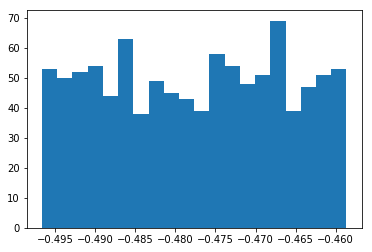

1000: D: 0.75/0.74 G: 0.73 (Real: [3.03192011487484, 0.4842676571517625], Fake: [3.068960896730423, 0.059706746220546794]) 


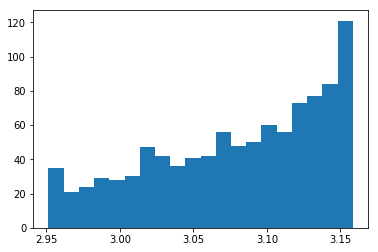

2000: D: 0.60/0.79 G: 0.59 (Real: [2.9747580859661102, 0.49043870498821934], Fake: [2.2393929693698884, 0.046792195176270784]) 


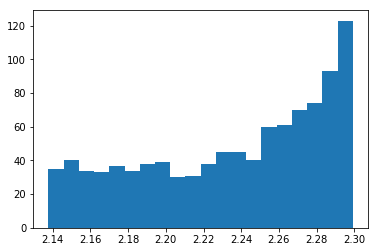

3000: D: 0.65/0.70 G: 0.69 (Real: [2.98873393201828, 0.49555506392106813], Fake: [2.7905973343849184, 0.051144069293576615]) 


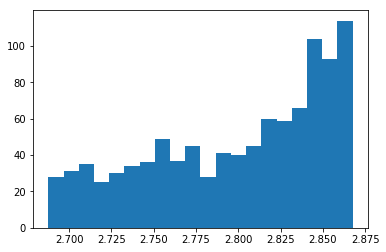

4000: D: 0.78/0.56 G: 0.84 (Real: [3.013559849858284, 0.5095247105531509], Fake: [3.9099649360179902, 0.04829276771315023]) 


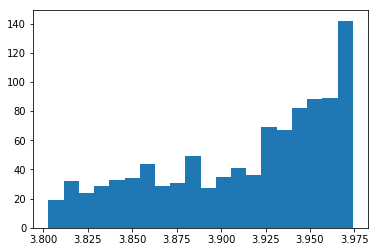

5000: D: 0.55/0.82 G: 0.58 (Real: [2.984232884287834, 0.5230201984036004], Fake: [2.173418404817581, 0.04302259253416122]) 


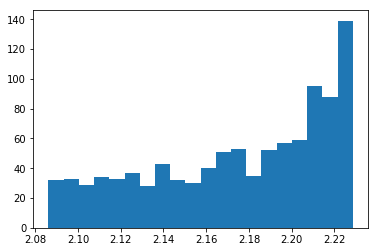

6000: D: 1.00/0.56 G: 0.83 (Real: [2.9854747978448866, 0.5024358834012348], Fake: [3.8252292976379394, 0.04026539504776121]) 


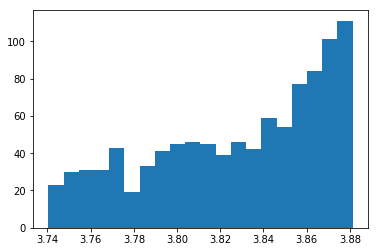

7000: D: 0.77/0.67 G: 0.71 (Real: [2.9987184435129164, 0.5061262717945778], Fake: [3.1809887118339537, 0.044010656590028244]) 


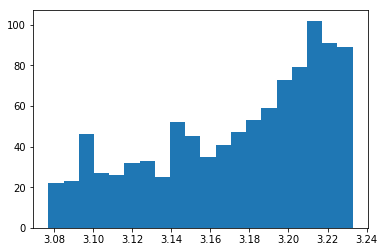

8000: D: 0.71/0.70 G: 0.74 (Real: [2.9550557054281237, 0.4905964491257084], Fake: [2.9158381168842316, 0.03868597927890595]) 


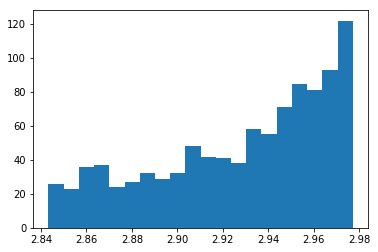

9000: D: 0.63/0.68 G: 0.74 (Real: [2.9908601595163344, 0.522173806154876], Fake: [3.1712251996994016, 0.03810275257944206]) 


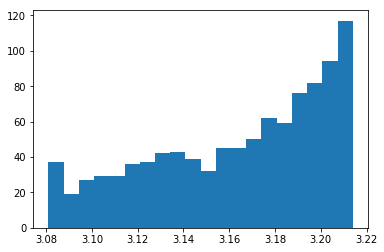

10000: D: 0.75/0.61 G: 0.83 (Real: [2.9826028150320054, 0.49836570573196376], Fake: [3.533737320661545, 0.031368708002451534]) 


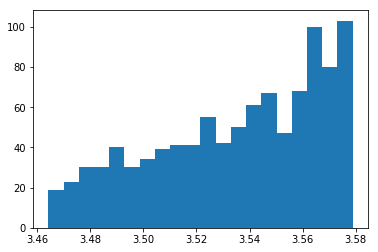

11000: D: 0.78/0.71 G: 0.68 (Real: [2.988909636616707, 0.510450216254968], Fake: [3.3880801548957824, 0.03407411044797974]) 


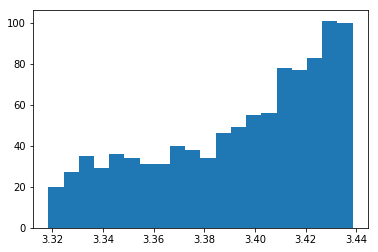

12000: D: 0.60/0.80 G: 0.59 (Real: [2.996907871365547, 0.4871663944564758], Fake: [2.7679644763469695, 0.03537618885811439]) 


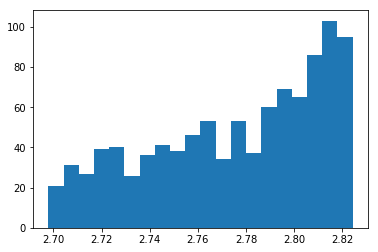

13000: D: 0.72/0.66 G: 0.77 (Real: [2.9575090535879136, 0.49313967161184113], Fake: [3.430273319244385, 0.028547472618920964]) 


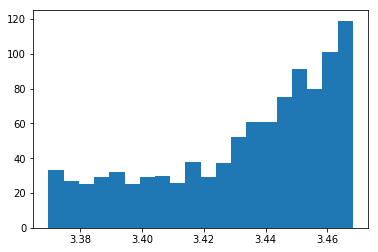

14000: D: 0.62/0.73 G: 0.65 (Real: [3.016933921933174, 0.4996828430623996], Fake: [2.8394915697574614, 0.04068022109214195]) 


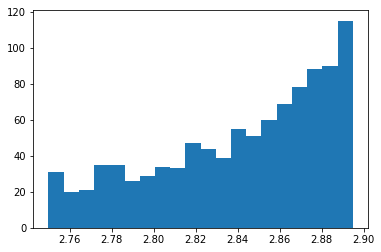

15000: D: 0.58/0.72 G: 0.68 (Real: [2.9880536752939224, 0.49546245924008897], Fake: [2.954356200456619, 0.04245154127115565]) 


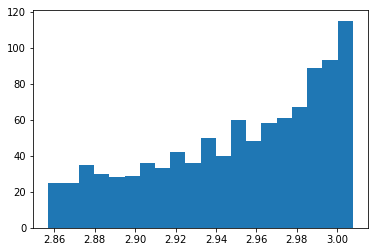

16000: D: 0.67/0.70 G: 0.69 (Real: [2.990204526901245, 0.5094329113200906], Fake: [2.9836928198337556, 0.02422598757594117]) 


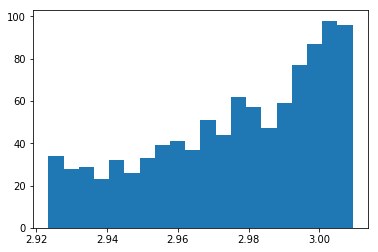

17000: D: 0.67/0.74 G: 0.64 (Real: [3.0003124668598176, 0.49685798406971093], Fake: [2.680166357040405, 0.029593108716715496]) 


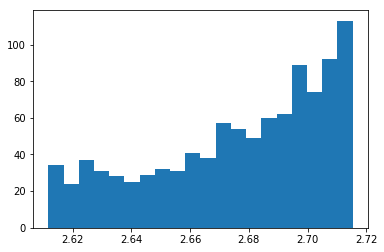

18000: D: 0.87/0.59 G: 0.72 (Real: [2.964941031694412, 0.4936619678267235], Fake: [3.3495771760940554, 0.021958173666439443]) 


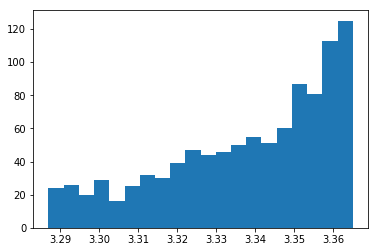

19000: D: 0.80/0.61 G: 0.80 (Real: [3.015707450866699, 0.4985374495092939], Fake: [3.4981909687519073, 0.02024865708814352]) 


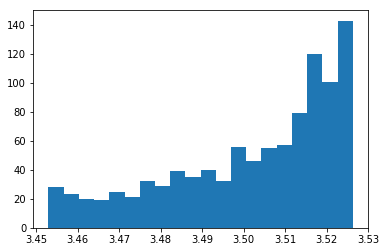

20000: D: 0.66/0.74 G: 0.65 (Real: [3.0065828582048417, 0.49005601519059605], Fake: [2.8611147472858427, 0.01954151527911708]) 


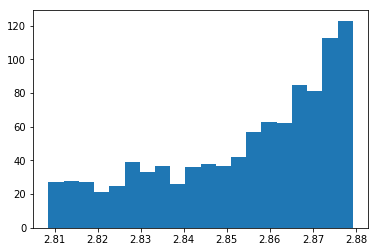

21000: D: 0.64/0.75 G: 0.66 (Real: [2.9877540006637573, 0.49304340965513466], Fake: [2.876719720363617, 0.021064166958547195]) 


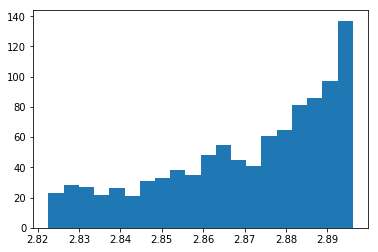

22000: D: 0.66/0.78 G: 0.60 (Real: [3.001690176606178, 0.5128945468678698], Fake: [2.6592855825424193, 0.022116181630159926]) 


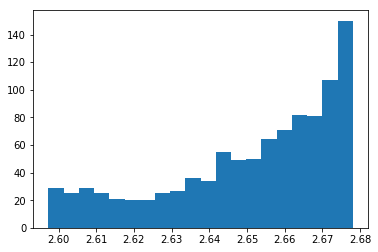

23000: D: 0.75/0.68 G: 0.71 (Real: [2.9713188591003417, 0.4803823747040432], Fake: [3.1116609485149382, 0.013742647453677311]) 


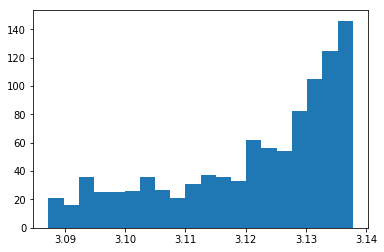

24000: D: 0.75/0.61 G: 0.81 (Real: [2.9987681334018705, 0.5074304490829153], Fake: [3.4015786871910096, 0.00996105360528618]) 


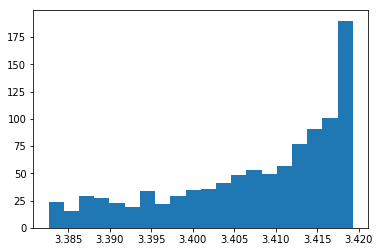

25000: D: 0.80/0.61 G: 0.77 (Real: [3.0086142818927764, 0.5118933549076679], Fake: [3.5946905665397644, 0.007419666470744734]) 


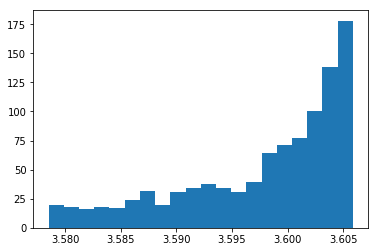

26000: D: 0.79/0.65 G: 0.71 (Real: [2.995629747033119, 0.48412285392874826], Fake: [3.4488307394981383, 0.0069683318614858535]) 


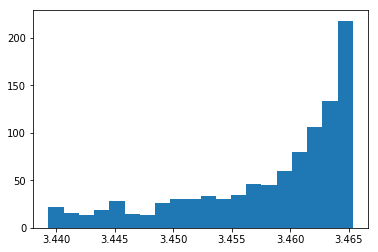

27000: D: 0.81/0.59 G: 0.78 (Real: [3.007918675899506, 0.5070842903954471], Fake: [3.5181426801681517, 0.005780580506139218]) 


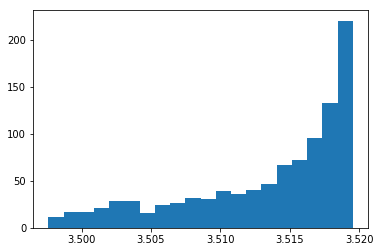

28000: D: 0.62/0.72 G: 0.67 (Real: [2.976141750574112, 0.5114901956930349], Fake: [2.9836909754276277, 0.007291903242247941]) 


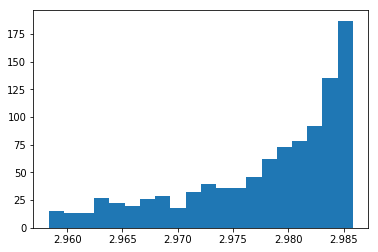

29000: D: 0.65/0.72 G: 0.68 (Real: [2.9944800778627396, 0.504143601432545], Fake: [3.0851967463493346, 0.007083368962424106]) 


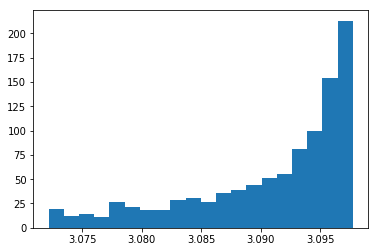

In [53]:
for epoch in range(num_epochs):
    for d_index in range(d_steps):
        D.zero_grad()
        d_real_data = d_sampler(d_input_size)
        d_real_decision = D(d_real_data)
        d_real_error = criterion(d_real_decision, torch.ones(1))
        d_real_error.backward()
        
        d_gen_input = gi_sampler(minibatch_size, g_input_size)
        d_fake_data = G(d_gen_input).detach()
        d_fake_decision = D(d_fake_data.t())
        d_fake_error = criterion(d_fake_decision, torch.zeros(1))
        d_fake_error.backward()
        
        d_optimizer.step()
        
    for g_index in range(g_steps):
        G.zero_grad()
        
        gen_input = gi_sampler(minibatch_size, g_input_size)
        g_fake_data = G(gen_input)
        dg_fake_decision = D(g_fake_data.t())
        g_error = criterion(dg_fake_decision, torch.ones(1))
        g_error.backward()
        
        g_optimizer.step()
    if epoch % print_interval == 0 :
        print("%s: D: %.2f/%.2f G: %.2f (Real: %s, Fake: %s) " % (epoch,
                                                            extract(d_real_error)[0],
                                                            extract(d_fake_error)[0],
                                                            extract(g_error)[0],
                                                            stats(extract(d_real_data)),
                                                            stats(extract(d_fake_data))))
        data_to_show = G(gen_input)
        plt.hist(data_to_show.detach().numpy(), bins=20)
        plt.show()

In [26]:
data = get_distribution_sampler(data_mean, data_stddev)(10000).numpy()[0]

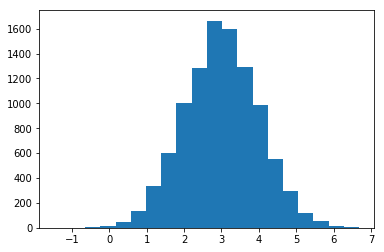

In [38]:
plt.hist(data, bins=20);